In [1]:
import aquire
import prepare

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [16]:
def pair_plot(df):
    p = sns.pairplot(df)
    return p

def heat_map(df):
    plt.figure(figsize=(15,8))
    q = sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

In [3]:
train_data = prepare.prep_titanic_data(aquire.get_titanic_train())
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Encoded_Sex,Encoded_Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,D,0,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,1,2


In [4]:
survived_summary = train_data.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Encoded_Sex,Encoded_Embarked
0,female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.0,1.407643
1,male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0,1.599653


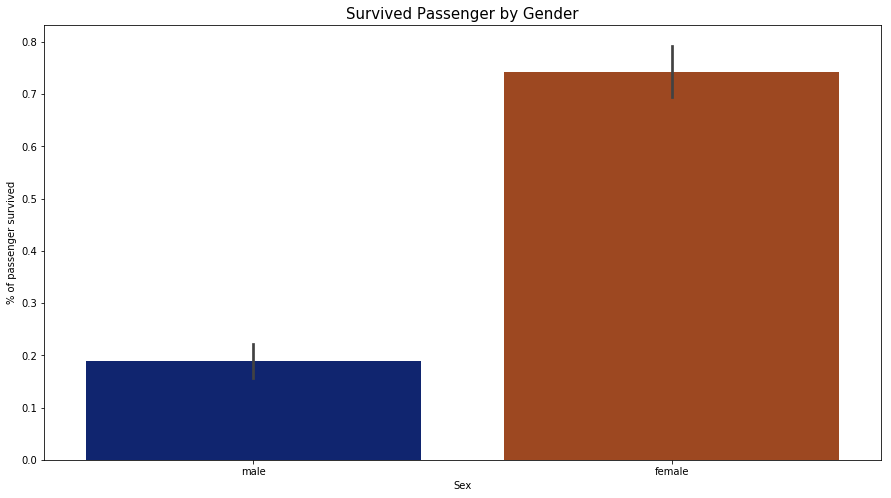

In [5]:
plt.figure(figsize=(15,8))
sns.barplot(x='Sex', y='Survived', data=train_data, linewidth=2, palette="dark")

plt.title("Survived Passenger by Gender", fontsize = 15)
plt.ylabel("% of passenger survived", fontsize = 10)
plt.xlabel("Sex",fontsize = 10);

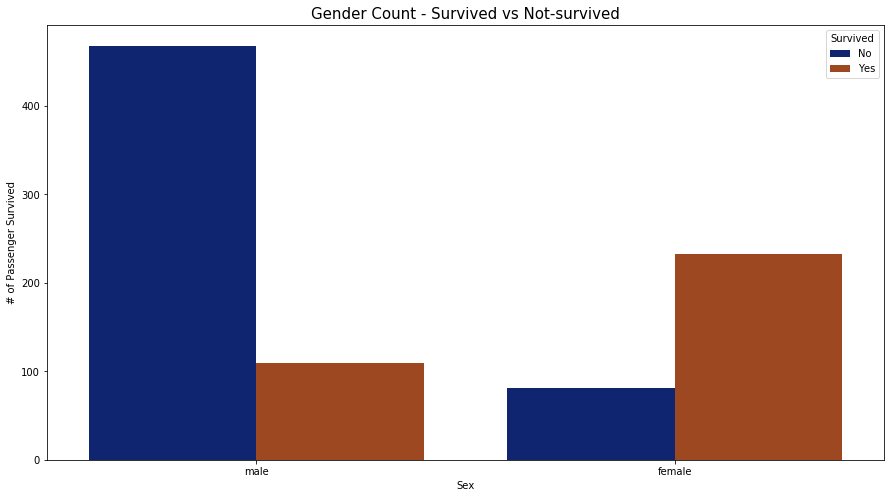

In [6]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Sex', hue='Survived', data=train_data, palette="dark")

plt.title("Gender Count - Survived vs Not-survived", fontsize = 15)
plt.xlabel("Sex", fontsize = 10);
plt.ylabel("# of Passenger Survived", fontsize = 10)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

In [7]:
train_data[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


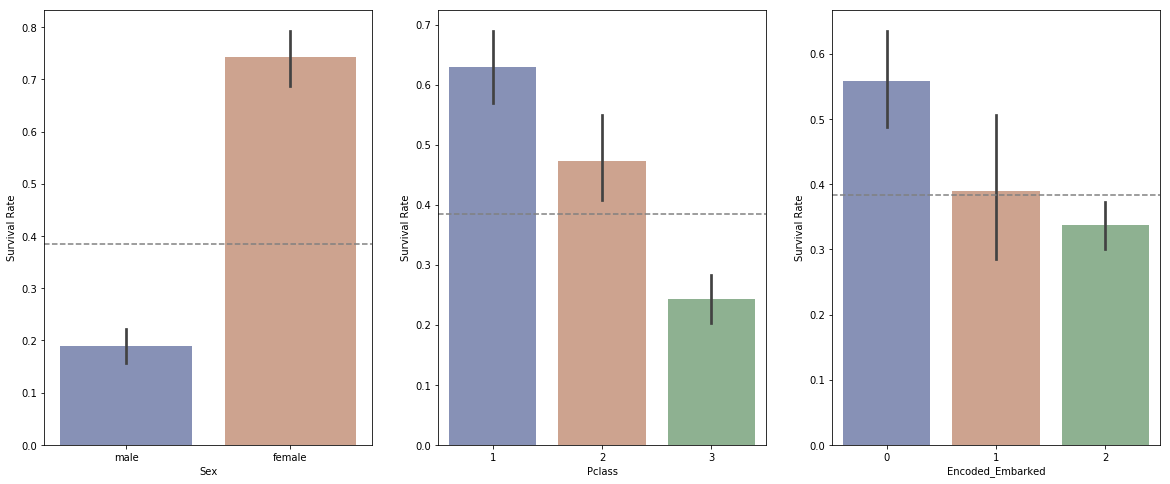

In [8]:
features = ['Sex', 'Pclass', 'Encoded_Embarked']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

survival_rate = train_data.Survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'Survived', data=train_data, ax=ax[i], alpha=.5, palette='dark')
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

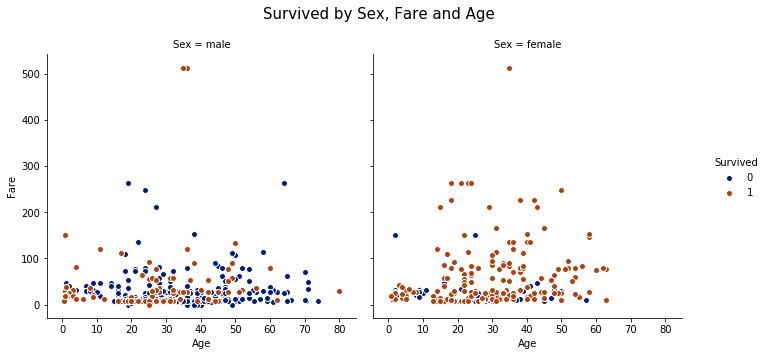

In [9]:
g = sns.FacetGrid(train_data, size=5,hue='Survived', col ='Sex', margin_titles=True, palette='dark')
g.map(plt.scatter, 'Age', 'Fare', edgecolor="w").add_legend()

g.fig.suptitle("Survived by Sex, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

Text(0.5, 1.0, 'Parents with Children Survival Rate')

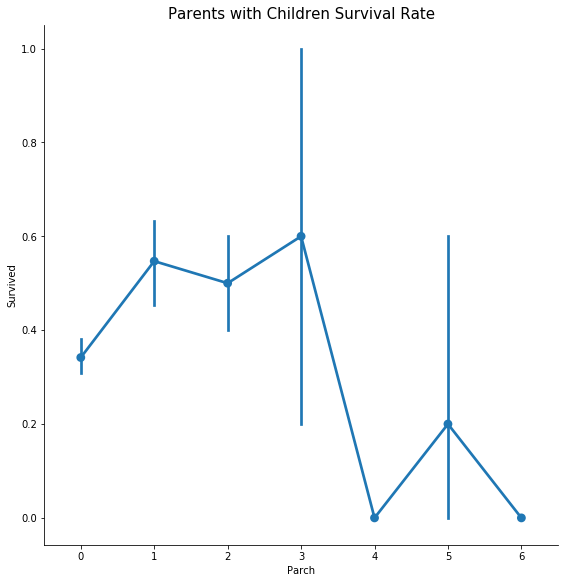

In [10]:
train_data = train_data[train_data.Fare < 500]

sns.factorplot(x = "Parch", y = "Survived", data = train_data, kind = "point",size = 8)
plt.title("Parents with Children Survival Rate", fontsize = 15)

Text(0.5, 1.0, 'Sibilings/Spouses Survival Rate')

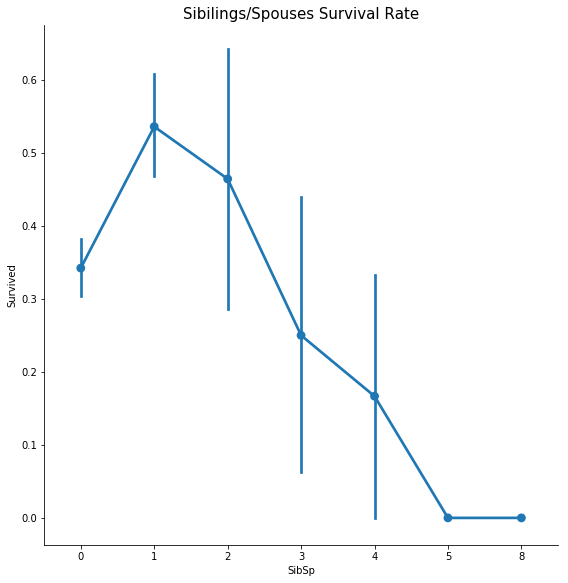

In [11]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train_data, kind = "point",size = 8)
plt.title('Sibilings/Spouses Survival Rate', fontsize = 15)

In [12]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Encoded_Sex,Encoded_Embarked
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164,0.647523,1.537162
std,0.486091,0.834007,14.552495,1.104186,0.806949,41.176366,0.478011,0.790854
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850,1.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,1.000000,2.000000


In [13]:
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Encoded_Sex,0.545899
Pclass,0.334068
Fare,0.261742
Encoded_Embarked,0.167449
Parch,0.082157
Age,0.079472
SibSp,0.033395


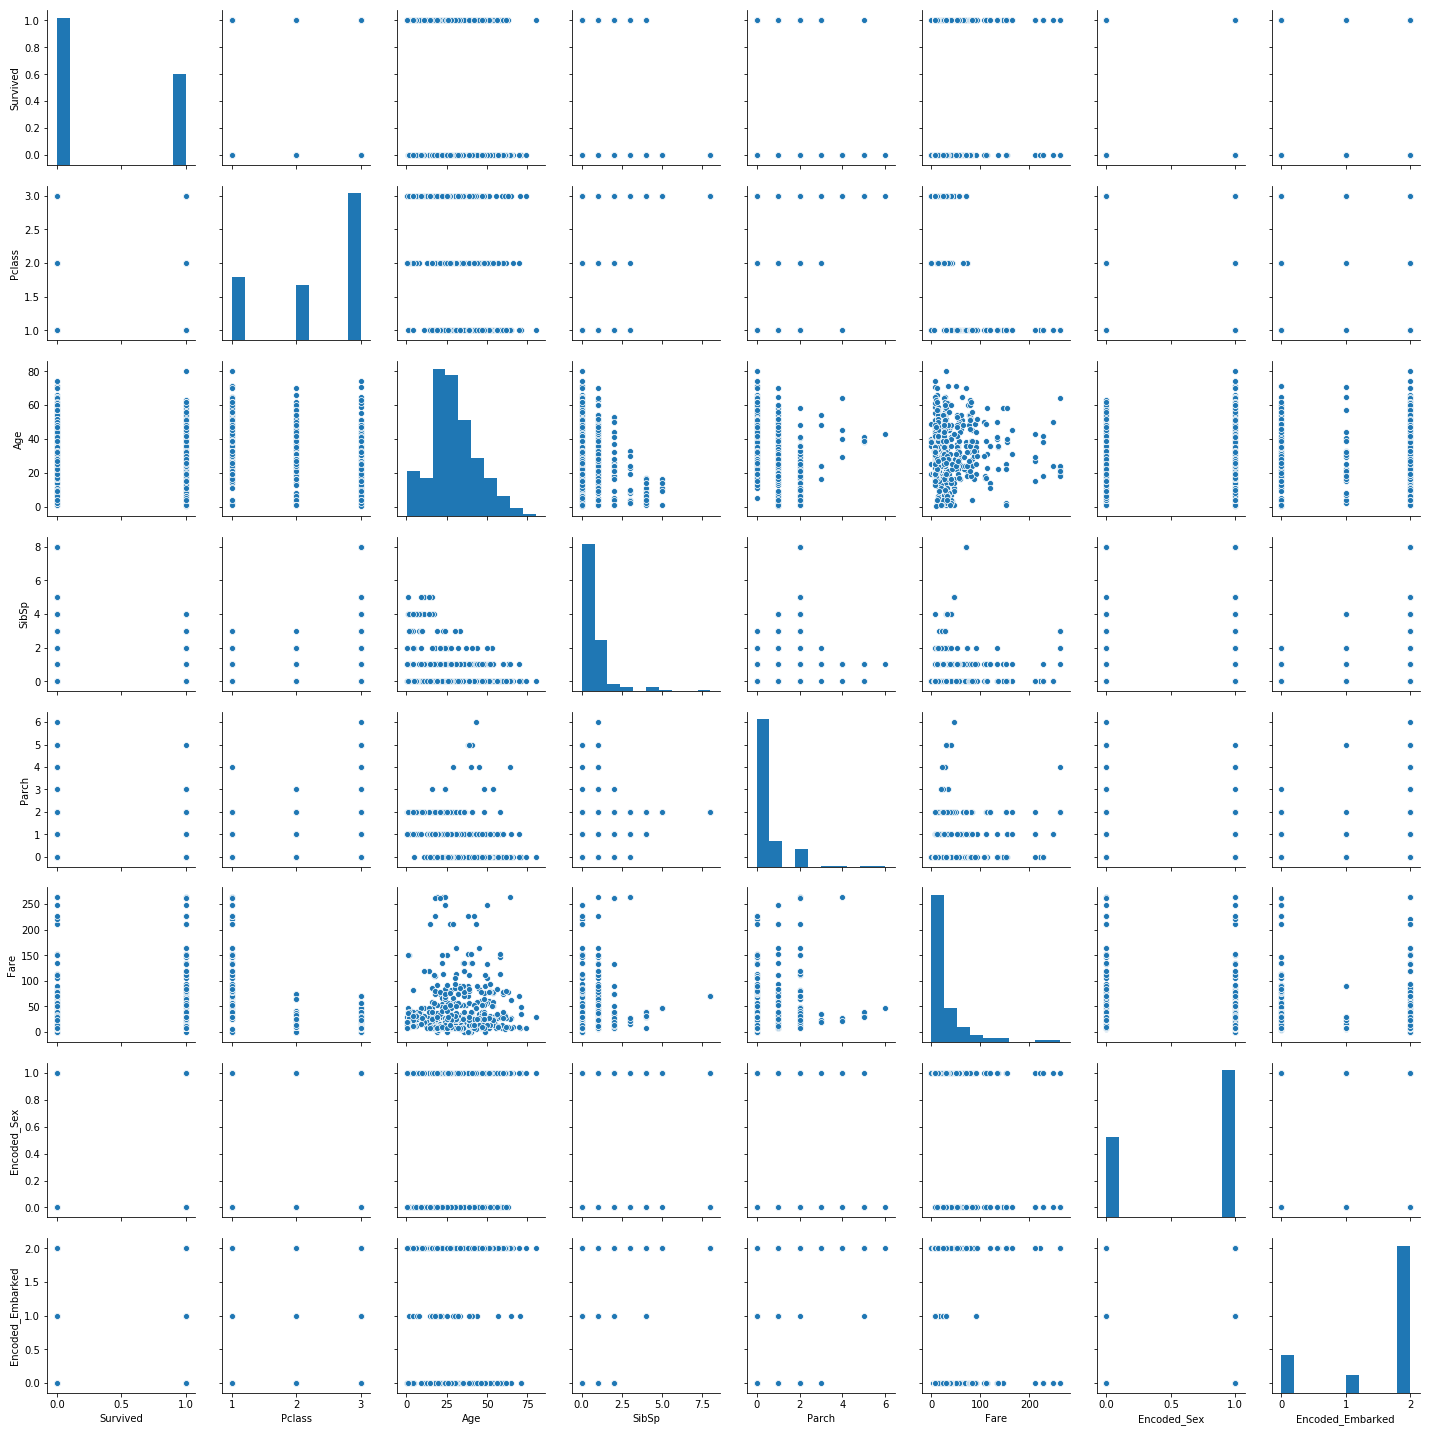

In [14]:
pair_plot(train_data)

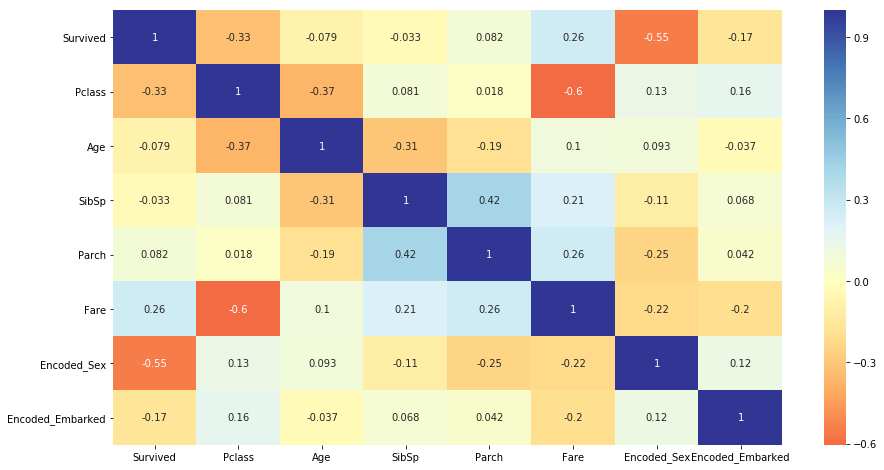

In [17]:
heat_map(train_data)